In [142]:
import pandas as pd
import umap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data='../data/mice/'
epic_man='https://support.illumina.com/content/dam/illumina-support/documents/downloads/productfiles/mouse-methylation/MouseMethylation-12v1-0_A1_Annotation_Mus_musculus.csv'
epic=pd.read_csv(epic_man,index_col=0,skiprows=7)

In [316]:
df=pd.read_csv(data+'meth.csv',index_col=0).T
df.shape

(144, 37492)

In [317]:
v=df.var()>.01
df=df[v[v].index]
df.shape

(144, 9666)

In [318]:
x = StandardScaler().fit_transform(df)
x.shape

(144, 9666)

In [319]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
dg = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
dg.index=df.index

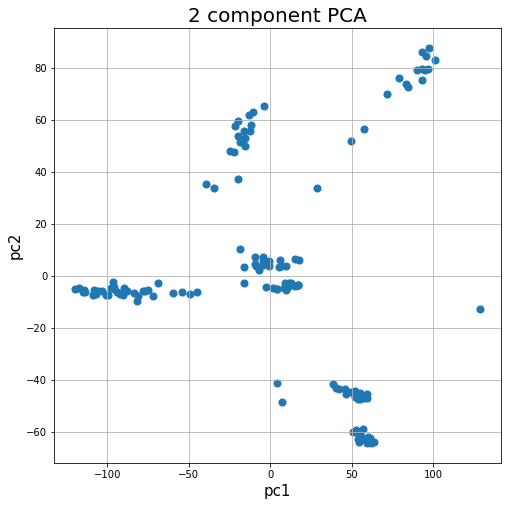

In [320]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(dg.loc[:, 'pc1']
            , dg.loc[:, 'pc2']
               , s = 50)
ax.grid()

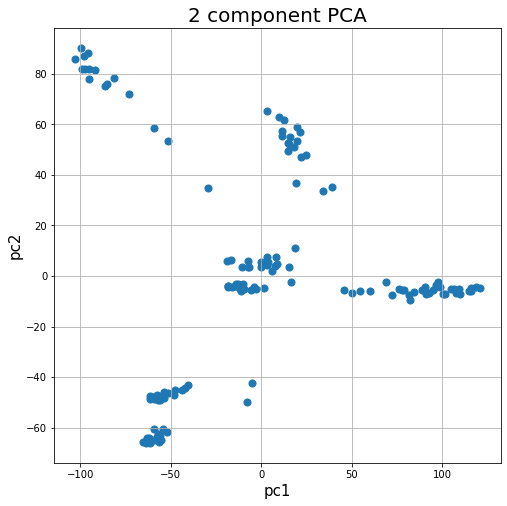

In [321]:
df=df.drop('205128010048_R04C01')
x = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
dg = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
dg.index=df.index
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(dg.loc[:, 'pc1']
            , dg.loc[:, 'pc2']
               , s = 50)
ax.grid()

In [322]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(x)
embedding.shape

(143, 2)

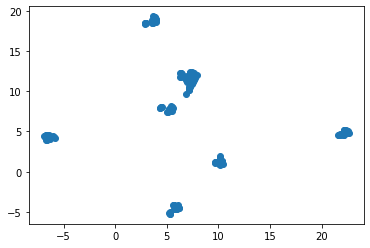

In [323]:
plt.scatter(embedding[:, 0], embedding[:, 1])

In [324]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=5,
).fit_predict(embedding)

In [325]:
dg['cluster']=labels

In [326]:
clustered = (labels >= 0)

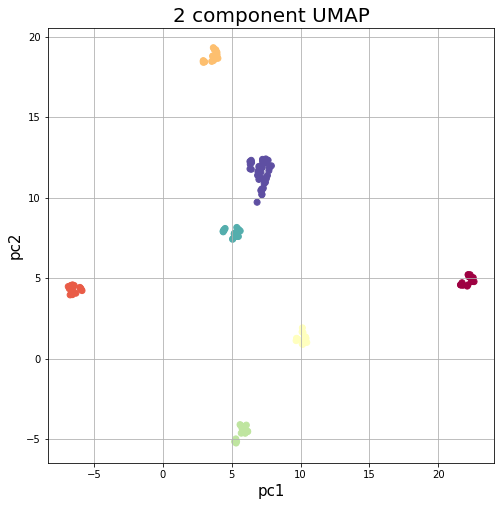

In [327]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component UMAP', fontsize = 20)
ax.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=labels[clustered],
            cmap='Spectral');
ax.grid()

In [328]:
dg.cluster.value_counts()

6    37
0    18
1    18
2    18
4    18
5    18
3    16
Name: cluster, dtype: int64

In [329]:
dg.to_csv(data+'clusters.csv')

In [330]:
hor=pd.read_csv(data+'HorvathMammal40.Manifest.May2020.manifest.csv',index_col=0)

/Users/mahdimoqri/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,48,49,50,51,52,53,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [331]:
meta=pd.read_csv(data+'SampleSheetMinimal84.csv',index_col=1)

In [332]:
meta['g']=meta.ExternalSampleID.str[0].astype(int)
meta['m']=meta.ExternalSampleID.str[2].astype(int)
meta['t']=meta.ExternalSampleID.str[-2:]
meta.t.value_counts()

_S    36
_H    18
_B    18
_K    18
_P    18
Lu    18
Li    18
Name: t, dtype: int64

In [333]:
meta=meta[meta.g==1&(meta.t=='Li')]

In [334]:
meta['d']=meta.m.replace({1:'n',2:'n',3:'n',4:'p',5:'p',6:'p'})

In [335]:
df1=df.merge(meta[['d','t']][meta.g==1],left_index=True,right_index=True)
df2=df.merge(meta[['d','t']][meta.g==2],left_index=True,right_index=True)
df3=df.merge(meta[['d','t']][meta.g==3],left_index=True,right_index=True)

In [336]:
dg=df1.groupby('d').median().T

<AxesSubplot:>

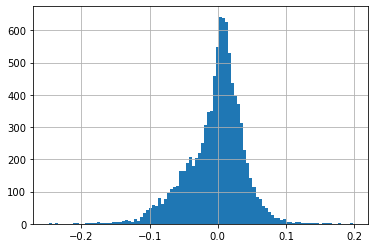

In [337]:
dg['d']=dg['n']-dg['p']
dg.d.hist(bins=100)

In [338]:
dg=dg[dg.d<-.1]
dg.shape

(206, 3)

In [339]:
dg=hor.loc[dg.index]
dg.CHR.value_counts()

chr1     31
chr2     20
chr3     16
chr11    12
chr17    12
chr9     12
chr10    11
chr12    11
chr5     10
chr14     9
chr7      9
chr16     8
chr19     8
chr8      6
chr6      5
chr4      5
chr22     5
chr15     4
chrX      3
chr13     3
chr18     3
chr20     2
chr21     1
Name: CHR, dtype: int64

In [340]:
dgh=hor.loc[dg.index][['HG38.seqnames','HG38.start','HG38.end','HG38.strand']]
dgh['HG38.start']=dgh['HG38.start'].astype(int)
dgh['HG38.end']=dgh['HG38.end'].astype(int)
dgh.reset_index(inplace=True,drop=True)
dgh.to_csv('dmh.txt',sep='\t')
dgh.head(1)

,HG38.seqnames,HG38.start,HG38.end,HG38.strand
0,chr17,48555603,48555604,-


In [341]:
dgh.shape


(206, 4)